In [41]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [42]:
points = np.vstack([np.random.multivariate_normal(mean, 
                                                  0.03 * np.diag([1,1]),
                                                  20) 
                           for mean in [(1, 1), (3, 3), (1, 2.5)]])

In [43]:
def obj_func(centroids, points, assignments):
    cost = 0
    for i, c in enumerate(centroids):
        for j, p in enumerate(points):
            if assignments[i, j]:
                cost += np.sum((p - c)**2)
    return cost
                
def assign(centroids, points):
    assignments = np.zeros((len(centroids), len(points)), dtype=bool)
    for j, p in enumerate(points):
        best = (None, None)
        for i, c in enumerate(centroids):
            score = np.sum((p - c)**2)
            if best[0] is None or score < best[0]:
                best = score, i
        assignments[best[1], j] = True
    return assignments
            
def readjust(centroids, points, assignments):
    for i in range(len(centroids)):
        centroids[i] = np.mean(points[assignments[i, :]], 0)

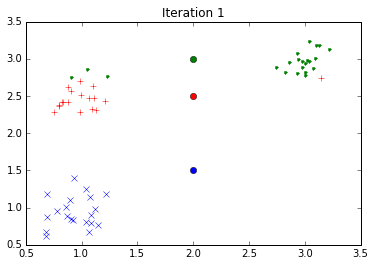

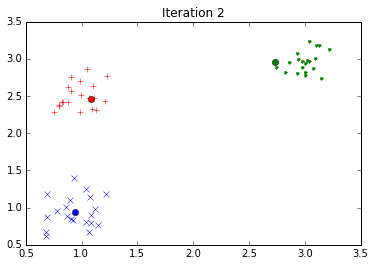

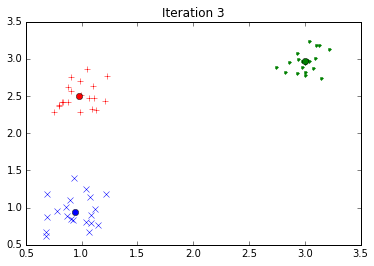

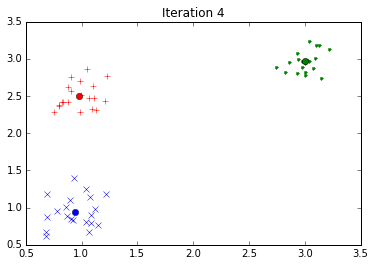

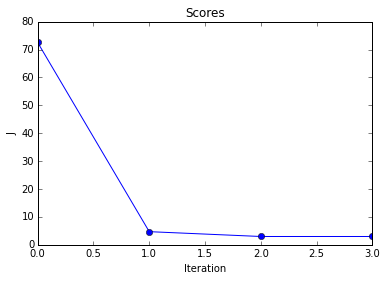

In [44]:
#centroids = np.array([[2, 3], [3, 2], [1.5, 2.5]])
centroids = np.array([[2, 2.5], [2, 3], [2, 1.5]])

scores = []
ass = None
colors = ['r', 'g', 'b']
markers = ['+', '.', 'x']
idx = 0
while len(scores) < 2 or scores[-1] != scores[-2]:
    #print("Centroids:", centroids)
    idx += 1
    ass = assign(centroids, points)
    plt.figure()
    plt.title('Iteration {}'.format(idx))
    for i in range(len(centroids)):
        p = points[ass[i,:]]
        plt.plot(p[:,0], p[:, 1], colors[i] + markers[i])

    for i, c in enumerate(centroids):
        plt.plot(c[0], c[1], colors[i] + 'o')
    plt.savefig('iteration{:02}.pdf'.format(idx))
    scores.append(obj_func(centroids, points, ass))
    #print("Scores:", scores)
    readjust(centroids, points, ass)
#plt.savefig('kmeans_bad.pdf')
    
plt.figure()
plt.plot(scores, '-o')
plt.xlabel('Iteration')
plt.ylabel('J')
plt.title('Scores')
#plt.savefig('scores.pdf')